In [42]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import tensorflow as tf
import mediapipe as mp
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Flatten, Bidirectional,BatchNormalization
from sklearn.metrics import confusion_matrix, accuracy_score


In [43]:
actions = ['chop', 'left', 'pinch', 'right']
DATA_PATH = 'data_npy'
numberOfFrame = 30


for action in actions: 
    for sequence in range(30):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [44]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [45]:
def mediapipe_detection(image, holistic_model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = holistic_model.process(image)        # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [46]:
def draw_styled_landmarks(image, results):
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [47]:
def extract_keypoints(results):
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([lh, rh])

In [48]:
def process_npy():    
    # Set mediapipe model 
    with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
        
        for action in actions:
            
            # Lấy danh sách tất cả video trong folder của action cụ thể
            video_folder = f'data_backup/{action}'
            videos = [f for f in os.listdir(video_folder) if f.endswith('.avi')]
            
            for videoCounter, videoFile in enumerate(videos):
                
                cap = cv2.VideoCapture(os.path.join(video_folder, videoFile))
                framesCount = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
                skipFrame = max(int(framesCount/30), 1)
                
                for frameCounter in range(numberOfFrame):
                    
                    cap.set(cv2.CAP_PROP_POS_FRAMES, frameCounter * skipFrame)
                    ret, frame = cap.read()
                    
                    if not ret:
                        break
                    
                    image, results = mediapipe_detection(frame, holistic)
                    draw_styled_landmarks(image, results)
                    cv2.imshow('OpenCV Feed', image)
                    
                    keypoints = extract_keypoints(results)
                    
                    # Tạo thư mục để lưu các keypoints của video và frame hiện tại
                    npy_dir = os.path.join('data_npy', action, str(videoCounter))
                    os.makedirs(npy_dir, exist_ok=True)  # Tạo thư mục nếu chưa tồn tại
                    
                    npy_path = os.path.join('data_npy', action, str(videoCounter), str(frameCounter))
                    np.save(npy_path, keypoints)
                    
                    print(f'{action}: saving frame {frameCounter} of video {videoCounter}')
                    
                    if cv2.waitKey(10) & 0xFF == ord('q'):
                        break
                
                cap.release()
        cv2.destroyAllWindows()

In [53]:
# with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
#     # Lấy danh sách tất cả video trong folder của hành động cụ thể
#     video_folder = f'data/right'
#     videos = [f for f in os.listdir(video_folder) if f.endswith('.avi')]  # Chỉ load số lượng video đã chọn
    
#     for videoCounter, videoFile in enumerate(videos):
        
#         cap = cv2.VideoCapture(os.path.join(video_folder, videoFile))
#         framesCount = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
#         skipFrame = max(int(framesCount/30), 1)  # Điều chỉnh số khung hình để lấy mẫu
        
#         for frameCounter in range(30):  # Lấy mẫu 30 khung hình từ mỗi video
            
#             cap.set(cv2.CAP_PROP_POS_FRAMES, frameCounter * skipFrame)
#             ret, frame = cap.read()
            
#             if not ret:
#                 break
            
#             # Phát hiện và vẽ landmarks
#             image, results = mediapipe_detection(frame, holistic)
#             draw_styled_landmarks(image, results)
#             cv2.imshow('OpenCV Feed', image)
            
#             # Trích xuất keypoints từ kết quả
#             keypoints = extract_keypoints(results)
            
#             # Tạo thư mục để lưu các keypoints của video và frame hiện tại
#             npy_dir = os.path.join('data_npy', 'right', str(videoCounter))
#             os.makedirs(npy_dir, exist_ok=True)  # Tạo thư mục nếu chưa tồn tại
            
#             npy_path = os.path.join('data_npy', 'right', str(videoCounter), str(frameCounter))
#             np.save(npy_path, keypoints)
            
#             print(f'right: saving frame {frameCounter} of video {videoCounter}')
            
#             if cv2.waitKey(10) & 0xFF == ord('q'):
#                 break
        
#         cap.release()
# cv2.destroyAllWindows()

right: saving frame 0 of video 0
right: saving frame 1 of video 0
right: saving frame 2 of video 0
right: saving frame 3 of video 0
right: saving frame 4 of video 0
right: saving frame 5 of video 0
right: saving frame 6 of video 0
right: saving frame 7 of video 0
right: saving frame 8 of video 0
right: saving frame 9 of video 0
right: saving frame 10 of video 0
right: saving frame 11 of video 0
right: saving frame 12 of video 0
right: saving frame 13 of video 0
right: saving frame 14 of video 0
right: saving frame 15 of video 0
right: saving frame 16 of video 0
right: saving frame 17 of video 0
right: saving frame 18 of video 0
right: saving frame 19 of video 0
right: saving frame 20 of video 0
right: saving frame 21 of video 0
right: saving frame 22 of video 0
right: saving frame 23 of video 0
right: saving frame 24 of video 0
right: saving frame 25 of video 0
right: saving frame 26 of video 0
right: saving frame 27 of video 0
right: saving frame 28 of video 0
right: saving frame 29 o

In [54]:
label_map = {label:num for num, label in enumerate(actions)}
label_map

{'chop': 0, 'left': 1, 'pinch': 2, 'right': 3}

In [55]:
def create_dataset():   
    sequences, labels = [], []    
    for action in actions:
        
        # Lấy danh sách tất cả video trong folder của action cụ thể
        video_folder = f'data_npy/{action}'
        videos = sorted([f for f in os.listdir(video_folder) if os.path.isdir(os.path.join(video_folder, f))], key=lambda x: int(x))
        
        videos = videos[:100]
        
        # Lặp qua tất cả video trong folder
        for sequence in videos:
            print(sequence)
            window = []
            for frame_num in range(30):  # Giả định rằng mỗi video có 30 frame cần xử lý
                # Đọc file numpy của từng frame
                print(f'{action}: Loading frame {frame_num} of video {sequence}')
                res = np.load(os.path.join('data_npy', action, sequence, "{}.npy".format(frame_num)))
                window.append(res)
            sequences.append(window)
            labels.append(label_map[action])
    
    return sequences, labels

In [56]:
sequences, labels = create_dataset()

X = np.array(sequences)
y = np.array(labels)

print(X.shape)
print(y.shape)

y = to_categorical(labels).astype(int)
# print(y.shape)

# y = y.argmax(axis=1)

0
chop: Loading frame 0 of video 0
chop: Loading frame 1 of video 0
chop: Loading frame 2 of video 0
chop: Loading frame 3 of video 0
chop: Loading frame 4 of video 0
chop: Loading frame 5 of video 0
chop: Loading frame 6 of video 0
chop: Loading frame 7 of video 0
chop: Loading frame 8 of video 0
chop: Loading frame 9 of video 0
chop: Loading frame 10 of video 0
chop: Loading frame 11 of video 0
chop: Loading frame 12 of video 0
chop: Loading frame 13 of video 0
chop: Loading frame 14 of video 0
chop: Loading frame 15 of video 0
chop: Loading frame 16 of video 0
chop: Loading frame 17 of video 0
chop: Loading frame 18 of video 0
chop: Loading frame 19 of video 0
chop: Loading frame 20 of video 0
chop: Loading frame 21 of video 0
chop: Loading frame 22 of video 0
chop: Loading frame 23 of video 0
chop: Loading frame 24 of video 0
chop: Loading frame 25 of video 0
chop: Loading frame 26 of video 0
chop: Loading frame 27 of video 0
chop: Loading frame 28 of video 0
chop: Loading frame 29

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
y_test.shape

(80, 4)

In [58]:
# log_dir = os.path.join('Logs')
# tb_callback = TensorBoard(log_dir=log_dir)

In [25]:
# model = Sequential()
# model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,126)))
# model.add(LSTM(128, return_sequences=True, activation='relu'))
# model.add(LSTM(64, return_sequences=False, activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(3, activation='softmax'))

# model.summary()

In [62]:
model = Sequential()
model.add(Bidirectional(LSTM(128, return_sequences=True, activation='relu'), input_shape=(30, 126)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Bidirectional(LSTM(64, return_sequences=True, activation='relu')))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(LSTM(32, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_4 (Bidirectional) │ (None, 30, 256)        │       261,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 30, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 30, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_5 (Bidirectional) │ (None, 30, 128)        │       164,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 30, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 30, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 32)             │        20,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 451,940 (1.72 MB)

 Trainable params: 451,172 (1.72 MB)

 Non-trainable params: 768 (3.00 KB)

In [63]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [64]:
history = model.fit(X_train, y_train, epochs=100, batch_size=20, shuffle=True, validation_split=0.1)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 12s 126ms/step - accuracy: 0.3395 - loss: 1.4515 - val_accuracy: 0.4688 - val_loss: 1.3435
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.6599 - loss: 0.8927 - val_accuracy: 0.4062 - val_loss: 1.4142
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.7719 - loss: 0.7410 - val_accuracy: 0.2188 - val_loss: 4.0488
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.6323 - loss: 0.9049 - val_accuracy: 0.4375 - val_loss: 5.9958
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.7562 - loss: 0.6920 - val_accuracy: 0.4062 - val_loss: 2.0317
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.8091 - loss: 0.5584 - val_accuracy: 0.4375 - val_loss: 2.1548
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.8409 - loss: 0.5296 - val_accuracy: 0.4375 - val_loss: 3.7515
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.8636 - loss: 0.4533 - val_accuracy: 

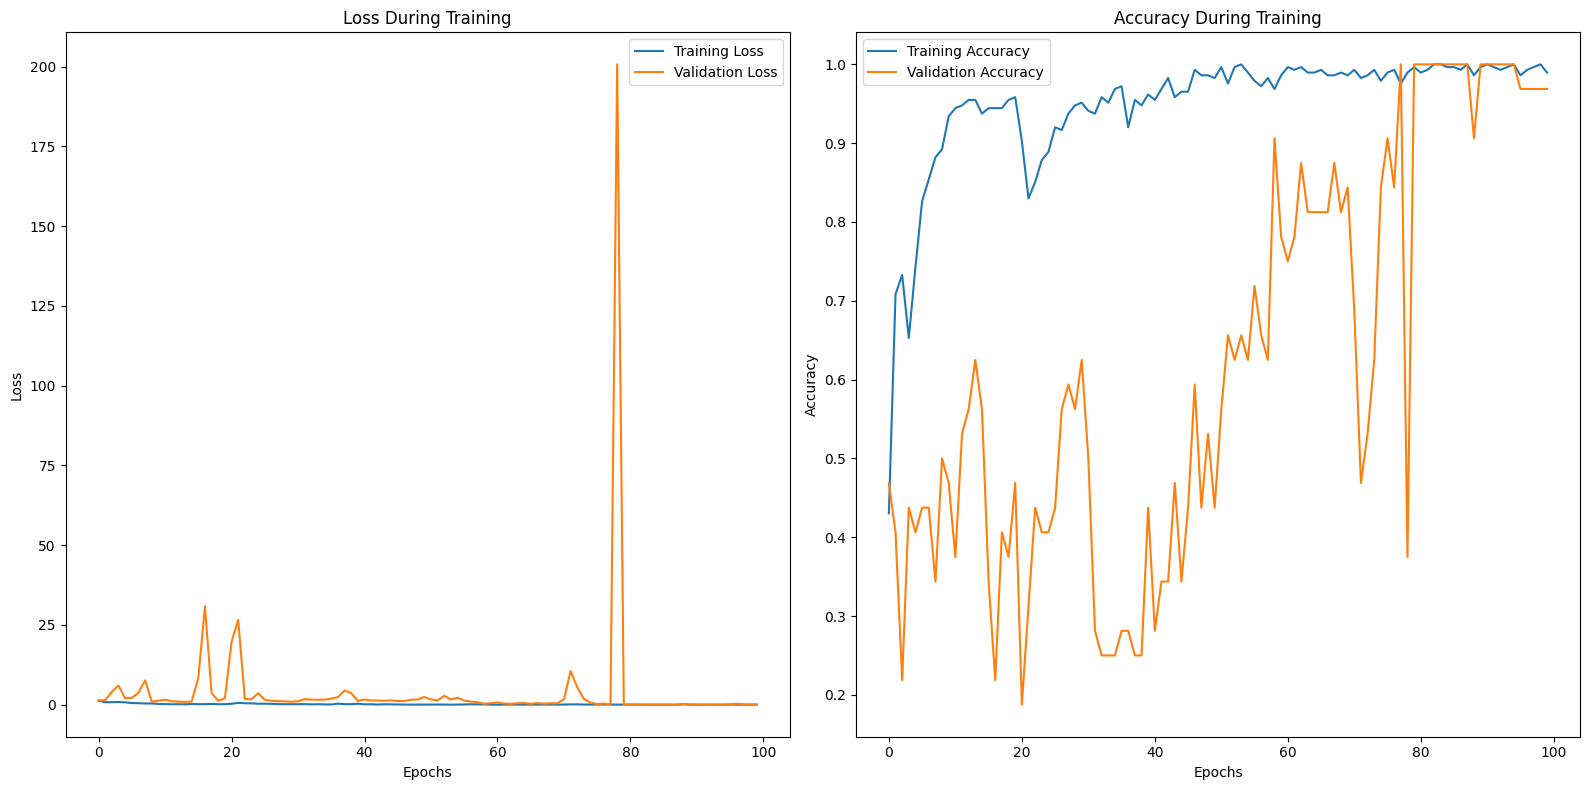

In [65]:
# Plot the loss and accuracy graphs together
plt.figure(figsize=(16, 8))

# Plot the loss graph
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot the accuracy graph
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy During Training')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [66]:
res = model.predict(X_test)
actions[np.argmax(res[4])]

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 479ms/step


'right'

In [67]:
yhat = model.predict(X_test)
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [68]:
confusion_matrix(ytrue, yhat)
# accuracy_score(ytrue, yhat)

array([[20,  0,  6,  0],
       [ 0, 17,  0,  0],
       [ 1,  0, 17,  0],
       [ 0,  0,  1, 18]], dtype=int64)

In [69]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [70]:
model.save('gestures.h5')

In [71]:
model = tf.keras.models.load_model('gestures.h5')

# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5
frame_counter = 0  # Khởi tạo biến đếm

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()
        
        # frame_counter += 1  # Tăng biến đếm lên mỗi khi đọc khung hình
        # if frame_counter % 3 != 0:  # Chỉ xử lý mỗi khung hình thứ 3 (tùy chỉnh)
        #     continue

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

d:\Phong\Coding\Hand Tracking\.venv\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

IndexError: list index out of range